# Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv("DoctorVisits (2).csv")
df.head(10)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


In [3]:
df.info()
df['illness'].value_counts()
df['gender'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


female    2702
male      2488
Name: gender, dtype: int64

# Visualize and analyse maximum, minimum and median income

Text(0, 0.5, 'Income in thousands')

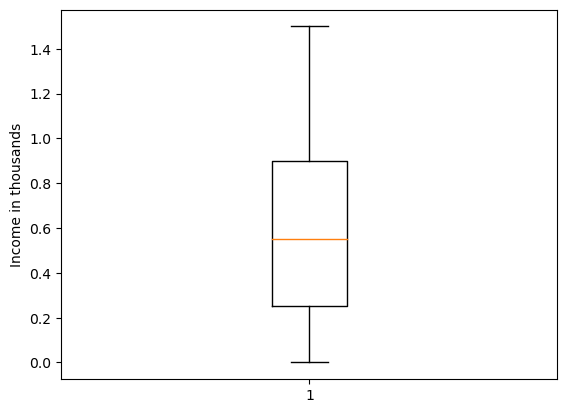

In [5]:

y=list(df.income)
plt.boxplot(y)
plt.ylabel("Income in thousands")

# Visualize and analyse reduced activity of male and female separately due to illness

<AxesSubplot:>

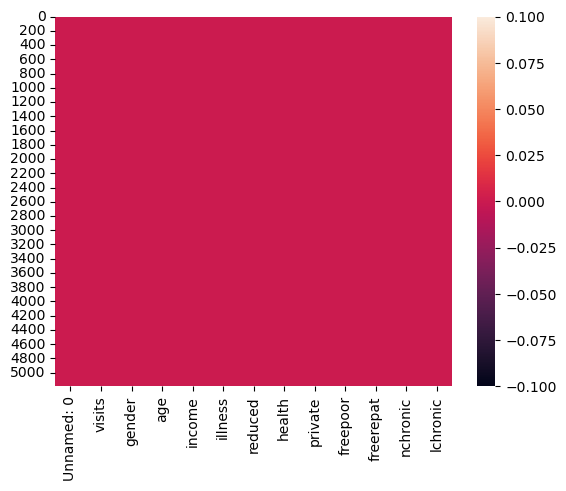

In [6]:
df.groupby(['gender','reduced']).mean()
sns.heatmap(df.isnull())

# visulize % od=f people getting govt health insurance due to income and old age and also %of people having private insurance


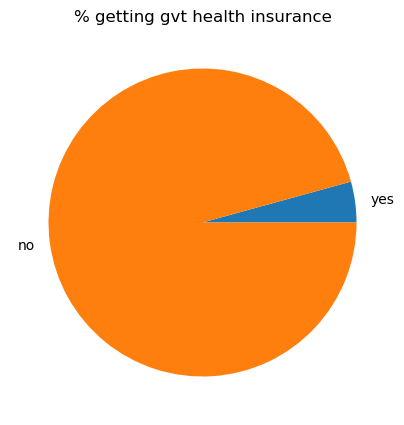

In [7]:
label=['yes','no']
Y=df[df['freepoor']=='yes']
N=df[df['freepoor']=='no']

x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% getting gvt health insurance")
plt.show()

# % of ppl having private insurnace

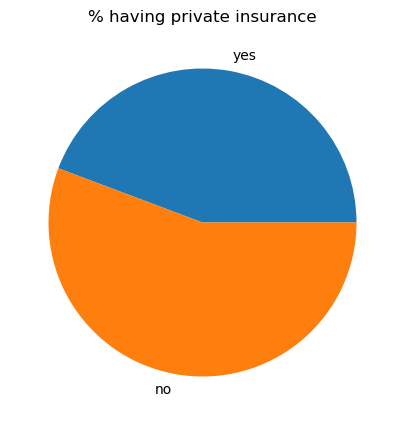

In [8]:

Y=df[df['private']=='yes']
N=df[df['private']=='no']

x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% having private insurance")
plt.show()


# % getting insurance due to old age


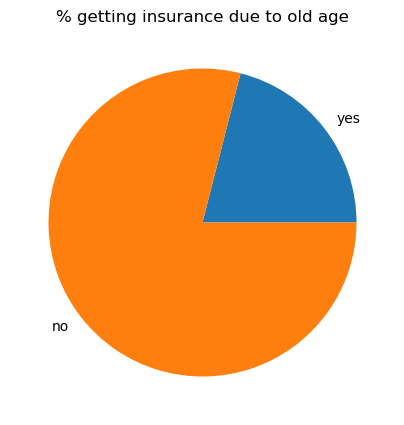

In [10]:
Y=df[df['freerepat']=='yes']
N=df[df['freerepat']=='no']

x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% getting insurance due to old age")
plt.show()

# Gender Distribution: Bar Chart

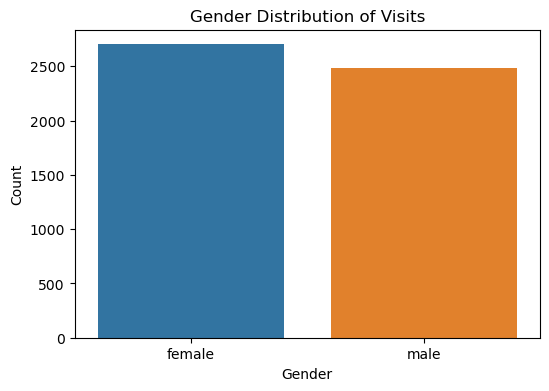

In [12]:

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution of Visits')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age Distribution: Histogram


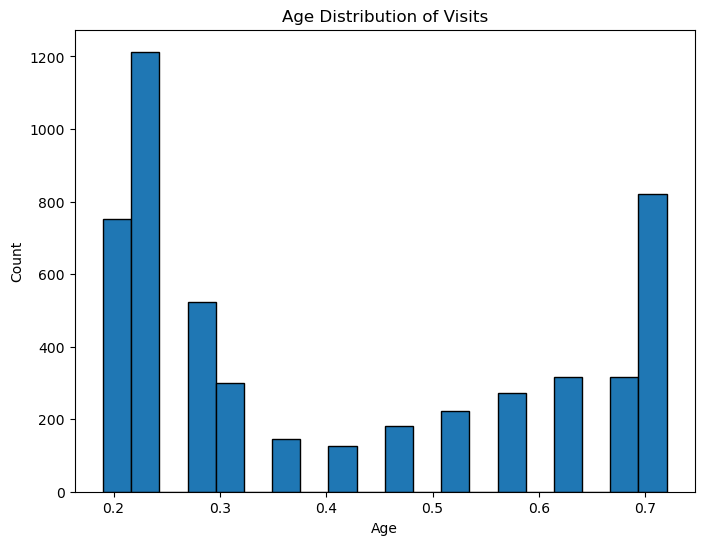

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='k')
plt.title('Age Distribution of Visits')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Income Analysis: Box Plot

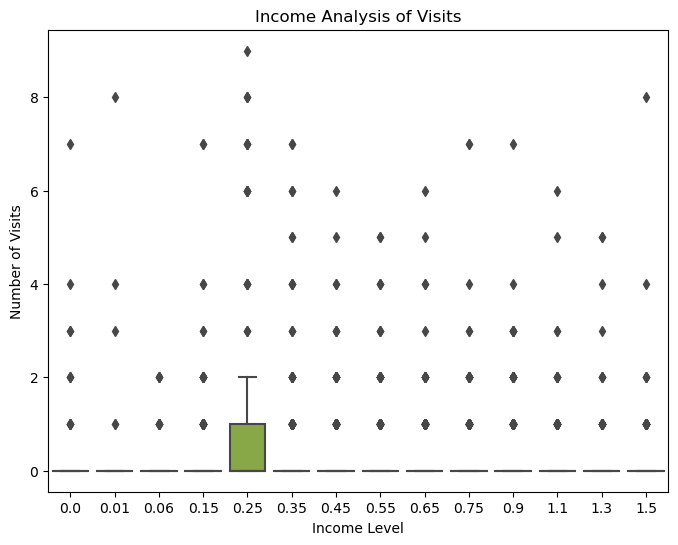

In [15]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='visits', data=df)
plt.title('Income Analysis of Visits')
plt.xlabel('Income Level')
plt.ylabel('Number of Visits')
plt.show()

# Illness Breakdown: Pie Chart

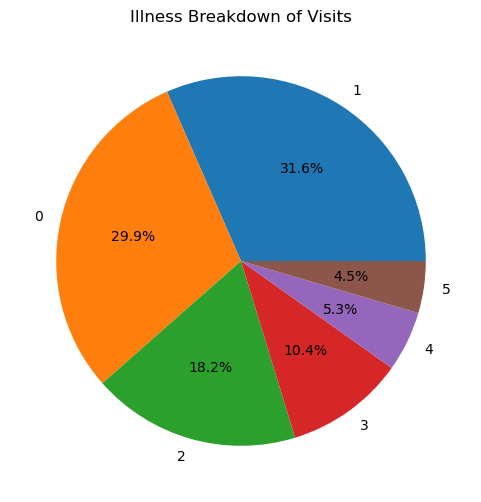

In [16]:
plt.figure(figsize=(6, 6))
df['illness'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Illness Breakdown of Visits')
plt.ylabel('')
plt.show()

# Reduced and Health: Stacked Bar Chart

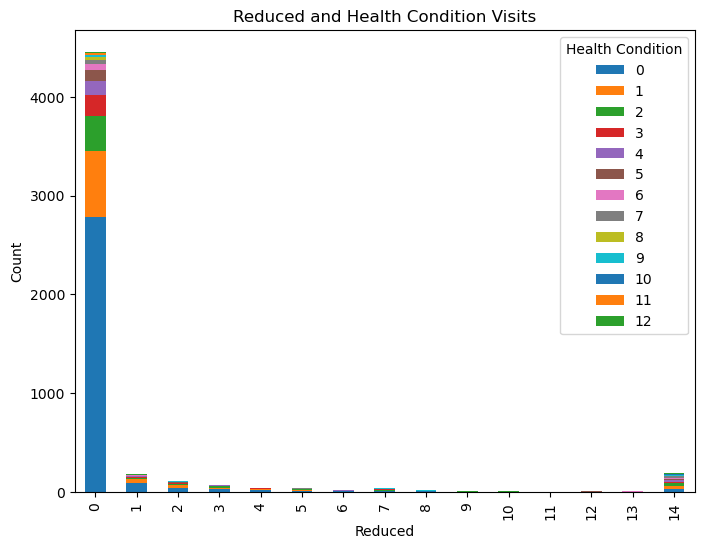

In [17]:

reduced_health_counts = df.groupby(['reduced', 'health']).size().unstack()
reduced_health_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Reduced and Health Condition Visits')
plt.xlabel('Reduced')
plt.ylabel('Count')
plt.legend(title='Health Condition', loc='upper right')
plt.show()

# Age vs. Visits: Scatter Plot

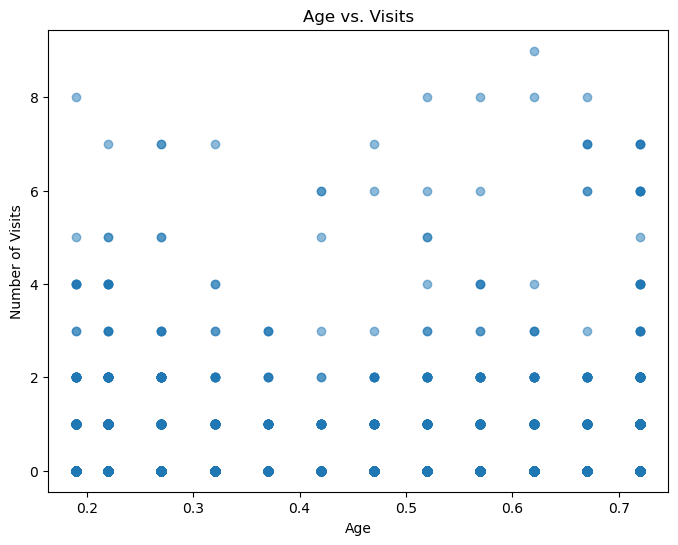

In [24]:

plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['visits'], alpha=0.5)
plt.title('Age vs. Visits')
plt.xlabel('Age')
plt.ylabel('Number of Visits')
plt.show()


# Income vs. Visits: Scatter Plot

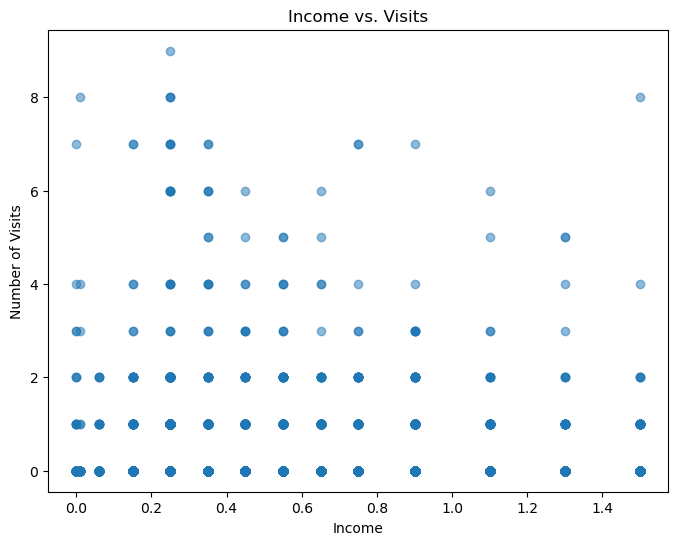

In [22]:

plt.figure(figsize=(8, 6))
plt.scatter(df['income'], df['visits'], alpha=0.5)
plt.title('Income vs. Visits')
plt.xlabel('Income')
plt.ylabel('Number of Visits')
plt.show()

# Chronic Conditions vs. Visits: Grouped Bar Chart

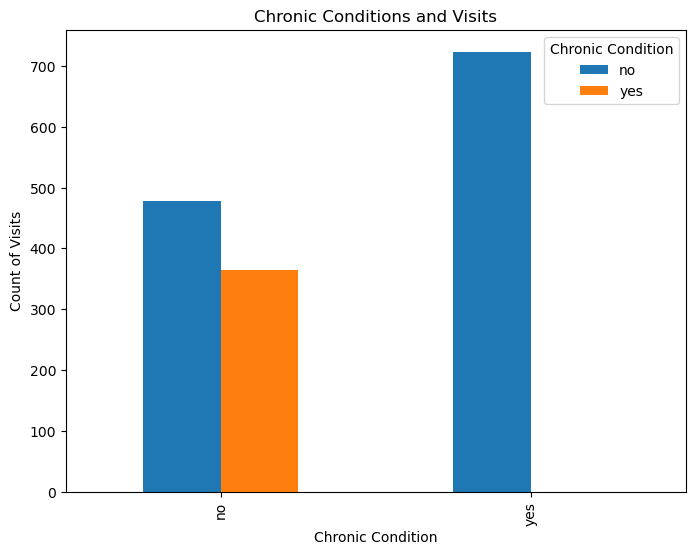

In [23]:

chronic_visits = df.groupby(['nchronic', 'lchronic'])['visits'].sum().unstack()
chronic_visits.plot(kind='bar', figsize=(8, 6))
plt.title('Chronic Conditions and Visits')
plt.xlabel('Chronic Condition')
plt.ylabel('Count of Visits')
plt.legend(title='Chronic Condition', loc='upper right')
plt.show()